# California Housing Prices

Los datos están sacados del censo de California en 1990.

Simplemente descargamos un único archivo comprimido, housing.tgz, que contiene un archivo de valores separados por comas (CSV) llamado housing.csv con todos los datos.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
#definimos qué backend queremos que utilice Jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import tarfile
from six.moves import urllib #paquete que reúne diversos módulos para trabajar con URLs

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" #Github repo con archivos
HOUSING_PATH = os.path.join("datasets", "housing") # path.join join one or more path components "intelligently"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" # carpeta del repo con los datos

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): # si no existe directorio, lo crea en la linea de abajo
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz") 
    urllib.request.urlretrieve(housing_url, tgz_path)# con urlretrieve ->
    # -> Copy a network object denoted by a URL to a local file
    housing_tgz = tarfile.open(tgz_path) # leemos / abrimos fichero
    housing_tgz.extractall(path=housing_path) # Extract all members from the archive to the current wrkng drectory
    housing_tgz.close()

In [4]:
#Llamamos a la función que busca los datos
fetch_housing_data()

In [5]:
#Importamos pandas
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
#Nos quedamos con los 10 primeras filas
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
#Sacar filas del dataframe
housing[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [12]:
# General info
housing.index

RangeIndex(start=0, stop=20640, step=1)

In [13]:
# informacion general
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
#Obtener numero de casas en cada rango de distancia
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Para sacar la media podemos hacerlo con Numpy o con Pandas

In [18]:
#Numpy - sacamos array
poblacion = np.array(housing.population)
print(poblacion)

[ 322. 2401.  496. ... 1007.  741. 1387.]


In [25]:
#Aplicamos los métodos de numpy al array
%timeit np.mean(poblacion)
print('Poblacion media: ' ,np.mean(poblacion))
print('Poblacion std: ' ,np.std(poblacion))

31.4 µs ± 7.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Poblacion media:  1425.4767441860465
Poblacion std:  1132.434687757615


### Aplicar método mean() a la columna del df de pandas

In [26]:
#Valor medio de una columna
%timeit housing.population.mean()

134 µs ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
#Estadísticas agregadas de múltiples columnas (valores numéricos)
housing[['population', 'total_bedrooms']].mean()

population        1425.476744
total_bedrooms     537.870553
dtype: float64

In [30]:
# Se pueden definir estadísticas agregadas en vez de las predefinidas por el describe()
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [36]:
type(housing['total_rooms'])

pandas.core.series.Series

In [34]:
housing.agg({'total_rooms' : ['skew', 'sum'],
            'population' : ['skew', 'mean']})

,total_rooms,population
mean,NaN,1425.476744
skew,4.147343e+00,4.935858
sum,5.440215e+07,NaN


In [35]:
#Podemos sacar los percentiles
print('percentil 25', np.percentile(poblacion, 25) )


percentil 25 787.0


### Podemos ayudarnos de las visualizaciones para entender los datos

Discover and visualize the data to gain insights

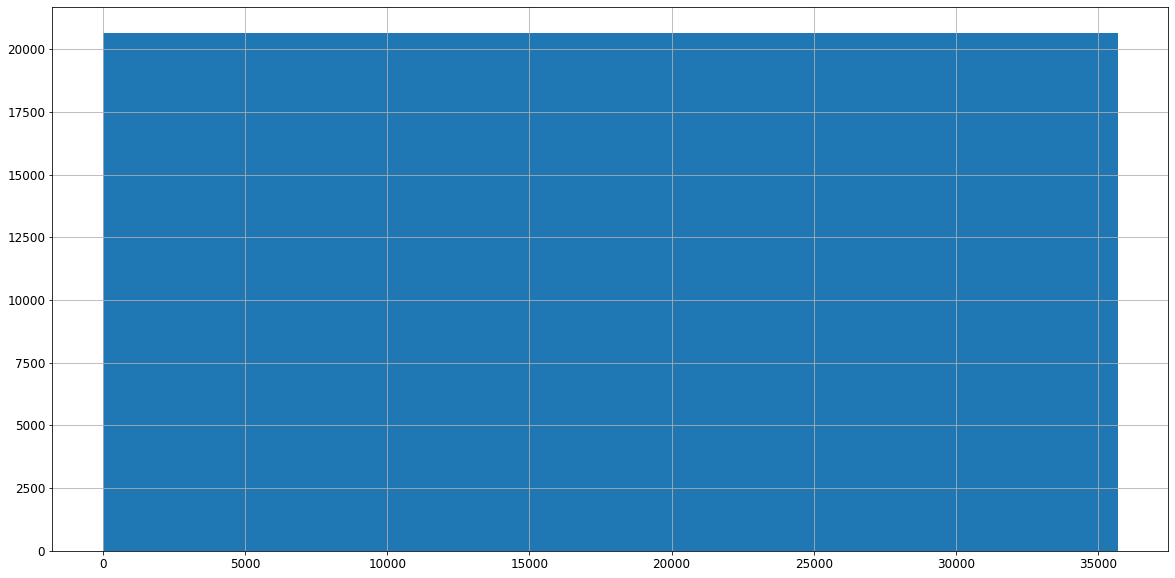

In [56]:
import matplotlib.pyplot as plt
housing.population.hist(bins = 1, figsize = (20,10))
plt.show()

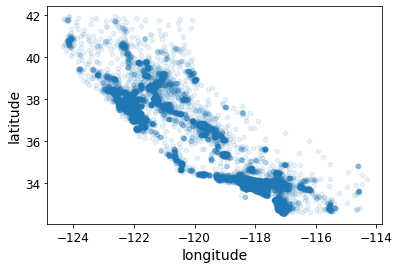

In [66]:
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha = 0.1)

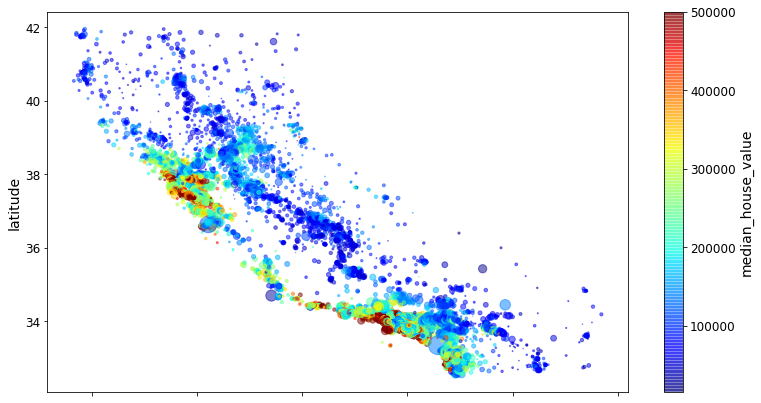

In [96]:
tams = ['peque', 'mediano', 'grande']
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha = 0.5,s=housing['population']/100,figsize = (13,7),
            c = 'median_house_value', cmap= plt.get_cmap('jet'), colorbar = True, sharex=True)


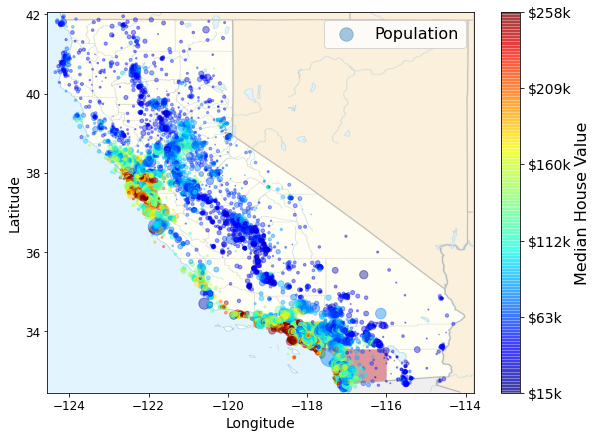

In [101]:
import matplotlib.image as mpimg

california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
#save_fig("california_housing_prices_plot")
plt.show()


In [105]:
corr_matrix = housing.corr()

In [106]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [133]:
a = np.linspace(0,10)
b = np.linspace(30,40)
b[-2] = 45
print(b)

my_df = pd.DataFrame({'c1':a,'c2':b})
#my_df
my_df.corr()

[30.         30.20408163 30.40816327 30.6122449  30.81632653 31.02040816
 31.2244898  31.42857143 31.63265306 31.83673469 32.04081633 32.24489796
 32.44897959 32.65306122 32.85714286 33.06122449 33.26530612 33.46938776
 33.67346939 33.87755102 34.08163265 34.28571429 34.48979592 34.69387755
 34.89795918 35.10204082 35.30612245 35.51020408 35.71428571 35.91836735
 36.12244898 36.32653061 36.53061224 36.73469388 36.93877551 37.14285714
 37.34693878 37.55102041 37.75510204 37.95918367 38.16326531 38.36734694
 38.57142857 38.7755102  38.97959184 39.18367347 39.3877551  39.59183673
 45.         40.        ]


,c1,c2
c1,1.000000,0.975084
c2,0.975084,1.000000


In [107]:
corr_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

### En muchas ocasiones, podemos crear datos nuevos a partir de datos ya existentes, por ejemplo:

In [139]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['households']

housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_household'],
      dtype='object')

In [144]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.688075
rooms_per_household       0.151948
total_rooms               0.134153
housing_median_age        0.105623
households                0.065843
total_bedrooms            0.049686
population               -0.024650
longitude                -0.045967
bedrooms_per_household   -0.046739
latitude                 -0.144160
Name: median_house_value, dtype: float64

In [149]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

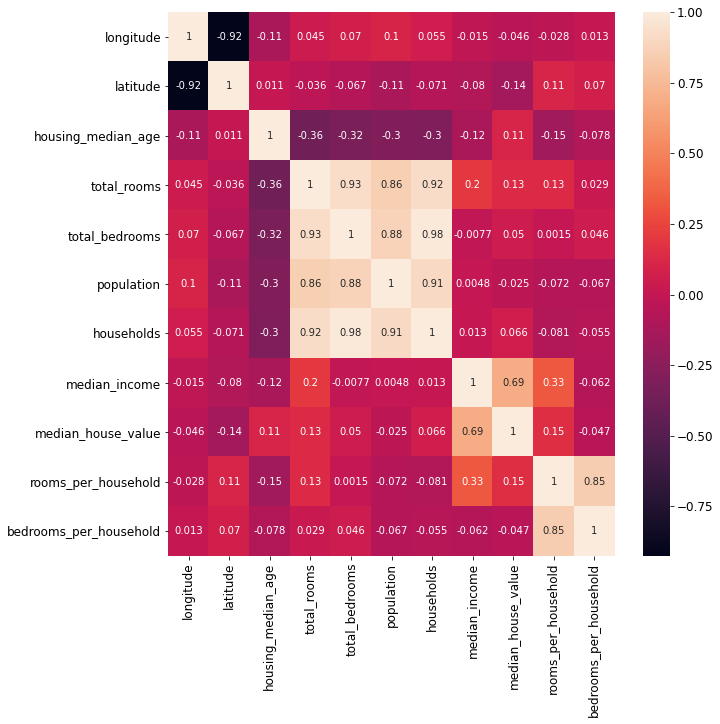

In [148]:
import seaborn as sns

plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot=True)
